# $\S1$. Walmart Sales (Linear, Polynomial, Ridge Regressions)

**Author**: [Gilyoung Cheong](https://www.linkedin.com/in/gycheong/)

We use the [dataset about Walmart sales from Kaggle by mikhail1681](https://www.kaggle.com/datasets/mikhail1681/walmart-sales?select=Walmart_sales.csv) to implement linear regression and polynomial regression models in practice. We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for manipulating dataframes.
*   [`numpy`](https://numpy.org/) for various mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for applying machine learning algorithms.
*   [`seaborn`](https://seaborn.pydata.org/) for data visualization.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting.

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

import seaborn as sns # apparently named after Samuel Norman Seaborn: https://stackoverflow.com/questions/41499857/why-import-seaborn-as-sns
import matplotlib.pyplot as plt

In [40]:
# Sample description of the data

url = "https://raw.githubusercontent.com/gycheong/machine_learning/main/data/Walmart_sales.csv"
df = pd.read_csv(url)
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4523,32,28-10-2011,1185391.96,0,42.76,3.550,195.331898,8.513
6393,45,13-01-2012,676615.53,0,41.18,3.513,189.326096,8.424
2142,15,12-10-2012,551799.63,0,49.12,4.186,138.911700,7.992
6303,45,23-04-2010,749779.10,0,53.47,2.902,181.677256,8.899
5329,38,29-10-2010,341219.63,0,61.09,3.016,126.436419,14.313


In [41]:
# Data types

df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

From above, we see that our dataframe (i.e., the object df) has the following parameters. Descriptions are from [the owner of the data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data).

| Parameter | Description | Content type |
|---|----|---|
| Store | Store number | integer |
| Date | Sales week start date | integer |
| Weekly_Sales | Sales | float |
| Holiday_Flag | Mark on the presence or absence of a holiday | integer (0 or 1) |
| Temperature | Air temperature in the region | float |
| Fuel_Price | Fuel cost in the region (USD) | float | 
| CPI | Consumer price index | float |
| Unemployment | Unemployment rate | float |

## Setting the goal

We want to construct a linear regression model and polynomial regression models (of several degrees) whose 
* input data are "Store", "Temperature", "Fuel_Price", "CPI", and "Unemployment" 
* and output data is "Weekly_Sales".

In [42]:
# We check if there are any NaN (not a number) values

print(df.isna().sum()) 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Pairplot and Scaling

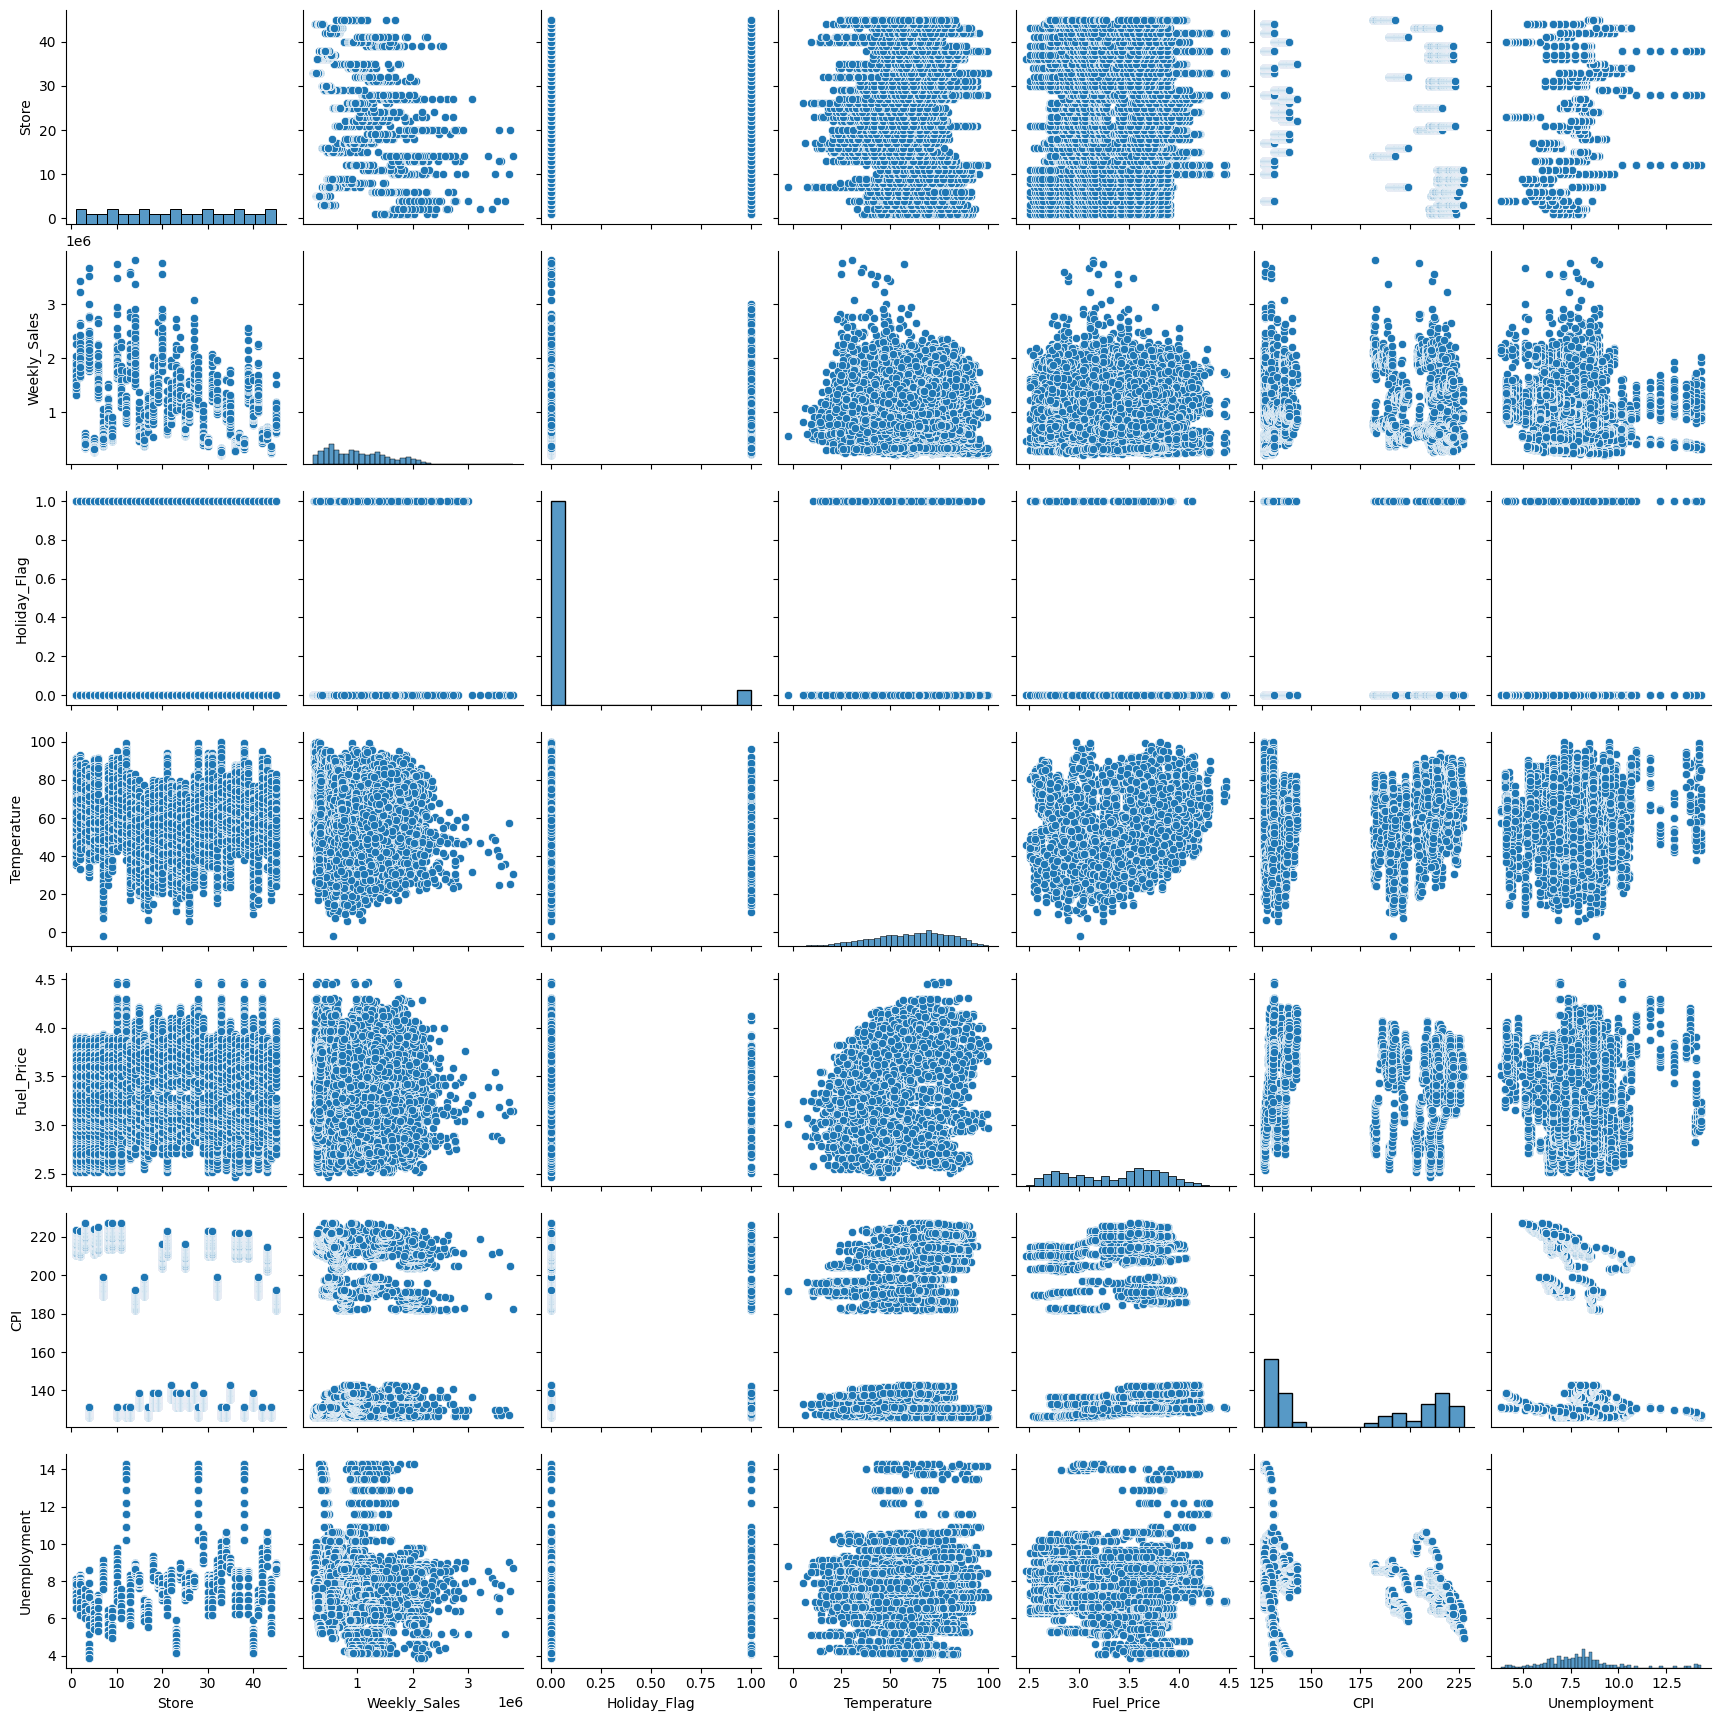

In [43]:
sns.pairplot(df)
plt.show()

We determine that Holiday_Flag may not be useful for our purpose, so we drop it. Moreover, since we do not see any sign of outliers, we will scale the data so that for each feature, the mean is $0$ and the standard deviation is $1$ before we construct a model.

In [44]:
df.drop('Holiday_Flag', axis = 1, inplace=True)
df.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106


## Scatter Plots

Let's make brief scatter plots to see how each input feature may be related to the output feature.

(0.0, 3999121.46)

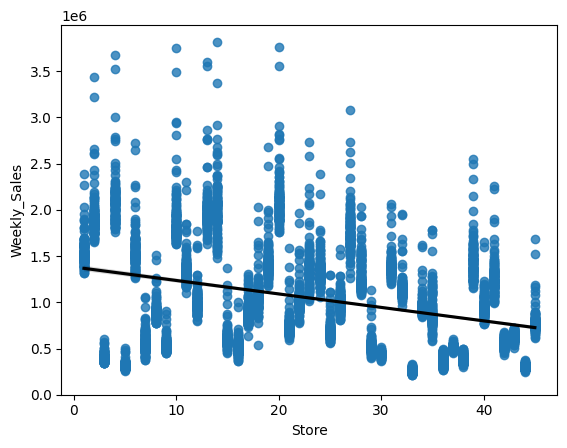

In [214]:
sns.regplot(x = "Store", y = "Weekly_Sales", data = df, line_kws = {"color" : "black"})
plt.ylim(0,)

(0.0, 3999121.46)

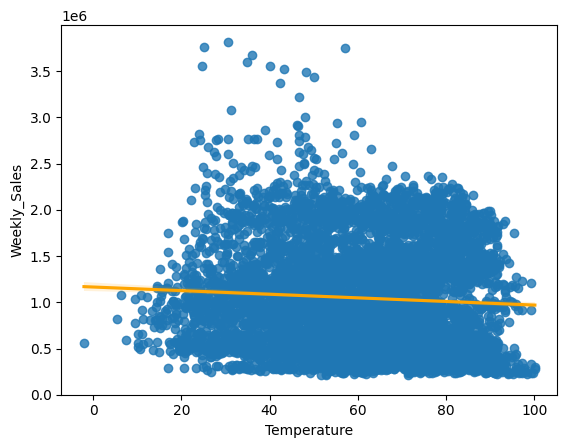

In [215]:
sns.regplot(x = "Temperature", y = "Weekly_Sales", data = df, line_kws = {"color" : "orange"})
plt.ylim(0,)

(0.0, 3999121.46)

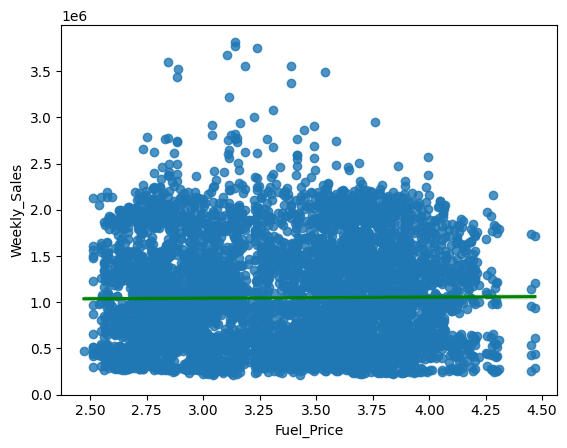

In [216]:
sns.regplot(x = "Fuel_Price", y = "Weekly_Sales", data = df, line_kws = {"color" : "green"})
plt.ylim(0,)

(0.0, 3999121.46)

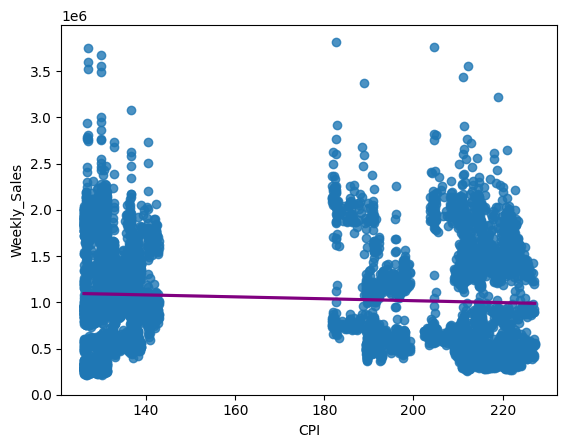

In [217]:
sns.regplot(x = "CPI", y = "Weekly_Sales", data = df, line_kws = {"color" : "purple"})
plt.ylim(0,)

(0.0, 3999121.46)

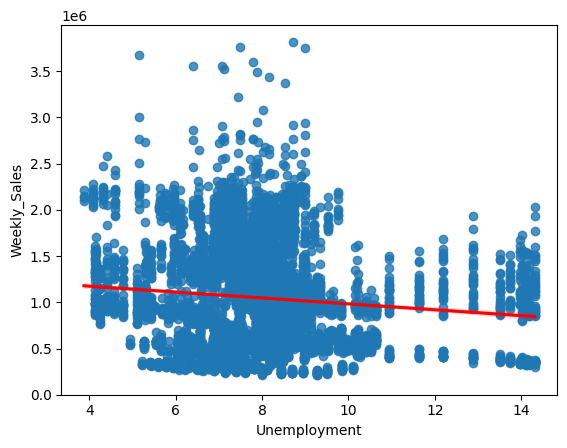

In [218]:
sns.regplot(x = "Unemployment", y = "Weekly_Sales", data = df, line_kws = {"color" : "red"})
plt.ylim(0,)


## Building Linear Regression Model with Ridge

In [45]:
x_data = df[["Store", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_data = df[["Weekly_Sales"]]

In [46]:
x, x_unbiased, y, y_unbiased = train_test_split(x_data, y_data, test_size=0.2, random_state=2)

# separating 20% of the unbiased data for the final test

In [74]:
# 5-fold cross validation on x, y (80% of the total given data)

kfold = KFold(n_splits=5, shuffle=True, random_state=12)
x_train = []
y_train = []
x_test = []
y_test = []
lr = []
parameters ={"alpha":[0.01,0.1,1,2,3,4,10,100,1000,1500,1600,1650,1700,1750,1800]}
# The list of parameters is chosen after a few trials


grid_lr = GridSearchCV(Ridge(), parameters, cv=5)
# cv=5 means a 5-fold cross validation; it is the default setting, so we didn't have to write it

grid_lr.fit(x, y)

print("Tuned hyper parameters:", grid_lr.best_params_)
param_lr = grid_lr.best_params_['alpha']
param_lr

Tuned hyper parameters: {'alpha': 1750}


1750

In [75]:
for i, (train_index, test_index) in enumerate(kfold.split(x,y)):
    lr.append(Ridge(alpha = param_lr))

    x_train.append(x.iloc[train_index])
    y_train.append(y.iloc[train_index])

    x_test.append(x.iloc[test_index])
    y_test.append(y.iloc[test_index])
    lr[i].fit(x_train[i], y_train[i])

### $R^2$ score (coefficient of determination)

A common measure to test whether output $\boldsymbol{\hat{y}} = (\hat{y}_1, \dots, \hat{y}_n)$ from the suggested model works well is to use the **$R^2$ score** (or the **coefficent of determiantion**) $\boldsymbol{y}$ against $\boldsymbol{\hat{y}}$, defined as follows:
$$R^2(\boldsymbol{y}, \boldsymbol{\hat{y}}) := 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{\boldsymbol{y}})^2}.$$

**Remark**. For now, we just note that the closer the $R^2$ score is to $1$ (on the test dataset), the better our model is. We also note that reversing the order of $\boldsymbol{y}$ and $\boldsymbol{\hat{y}}$ generally leads to a different quantity.

In [76]:
yhat = []

for i in range(len(lr)):
    yhat.append(lr[i].predict(x_test[i])) 
    print("The value of R^2 (using .score):", lr[i].score(x_test[i], y_test[i]))
    print("The value of R^2 (using r2_score):", r2_score(y_test[i], yhat[i]), "\n")

# given by plugging in our test value into the 5 linear models we developed above
# The computed R^2 scores indicate that maybe it is not the best to use the linear regression

The value of R^2 (using .score): 0.15282101949552174
The value of R^2 (using r2_score): 0.15282101949552174 

The value of R^2 (using .score): 0.15809432132047585
The value of R^2 (using r2_score): 0.15809432132047585 

The value of R^2 (using .score): 0.15196306483882493
The value of R^2 (using r2_score): 0.15196306483882493 

The value of R^2 (using .score): 0.11295625325212844
The value of R^2 (using r2_score): 0.11295625325212844 

The value of R^2 (using .score): 0.13876077331991843
The value of R^2 (using r2_score): 0.13876077331991843 



## Building Polynomial Regression Models with Ridge

We now start building polynomial regression models. We shall note that the case where degree is 1 should give the same result as the linear regression we tried above without ridge. The reason we won't add any ridge to the polynomial regression is that GridSearchCV cannot tune the hyper parameters, as polynomial features have too big of size.

In [103]:
poly = []
pr = []

x_train_pr = []
x_test_pr = []

yhat_pr = []

for d in range(11): # d is the (max) degree for polynomial features
    poly.append(PolynomialFeatures(degree=d))
    pr.append(LinearRegression())
    x_train_pr.append([])
    x_test_pr.append([])
    
    yhat_pr.append([])

    for i in range(len(x_train)):
        x_train_pr[d].append(poly[d].fit_transform(x_train[i]))
        x_test_pr[d].append(poly[d].fit_transform(x_test[i]))
        # Note that we do not need a "degree d version" of y_train nor y_test


        pr[d].fit(x_train_pr[d][i], y_train[i])
        yhat_pr[d].append(pr[d].predict(x_test_pr[d][i]))

# x_train_pr[d] has 5 degree d x_train data which are x_train_pr[d][0], ..., x_train_pr[d][4]        
# yhat_pr[d] has 5 degree d prediction data which are yhat_pr[d][0], ..., yhat_pr[d][4]

In [104]:
for d in range(11):
    print("Degree ", d)    
    sum = 0
    
    for i in range(len(x_train)):
        c = r2_score(y_test[i], yhat_pr[d][i])
        sum += c
        print("The value of R^2:", c)

    print("Average R^2:", sum / len(x_train))
    print()


Degree  0
The value of R^2: -0.00028714383655192854
The value of R^2: -3.294814043020011e-05
The value of R^2: -0.0004972749945919563
The value of R^2: -0.0012922798297856364
The value of R^2: -0.0019486648634456927
Average R^2: -0.0008116623329610829

Degree  1
The value of R^2: 0.15237283205709018
The value of R^2: 0.1577902428631197
The value of R^2: 0.15072915083769634
The value of R^2: 0.11284986220349802
The value of R^2: 0.1395893452096495
Average R^2: 0.14266628663421074

Degree  2
The value of R^2: 0.28539797910169606
The value of R^2: 0.27446306128706943
The value of R^2: 0.282109138298158
The value of R^2: 0.22664796515718988
The value of R^2: 0.2385353551779964
Average R^2: 0.26143069980442196

Degree  3
The value of R^2: 0.38658753967168924
The value of R^2: 0.3595333425157917
The value of R^2: 0.38124361495145065
The value of R^2: 0.3521802068146286
The value of R^2: 0.3539484886460562
Average R^2: 0.36669863851992324

Degree  4
The value of R^2: 0.5442892242372569
The va

## Choosing a model and giving it a final test

Based on the above R2-scores, we choose the degree 8 polynomial regression model. Using the unbiased data separated before we tried the 5-fold split, we test the model one more time:

In [105]:
yhat_unbiased = pr[8].predict(poly[8].fit_transform(x_unbiased))

print("The R^2 of the chosen:", r2_score(y_unbiased, yhat_unbiased))

The R^2 of the chosen: 0.6913247516740328
